In [19]:
import csv
import pandas as pd

# Read the data from the provided CSV file
data = []
with open("students_data.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append(row)

# Separate the data into different lists for name, university, and CGPA
names = []
universities = []
CGPAs = []
for row in data:
    names.append(row[0])
    universities.append(row[1])
    CGPAs.append(row[2])

# Create a pandas DataFrame with the extracted data and set appropriate column names
data = pd.DataFrame({
    'name': names,
    'university': universities,
    'CGPA': CGPAs
})

# Print the first few rows of the data to inspect the content
print("First few rows of the data:")
print(data.head())

# Data types of each column and number of missing values
print("\nData types of each column:")
print(data.dtypes)

print("\nNumber of missing values in each column:")
print(data.isnull().sum())

# Check the unique values in the CGPA column
print("\nUnique values in CGPA column:")
print(data['CGPA'].unique())


# Question 1: Top 5 universities with the highest average CGPA
# Clean the 'CGPA' column and convert it to numeric
data['CGPA'] = pd.to_numeric(data['CGPA'], errors='coerce')

# Calculate the average CGPA for each university and find the top 5 universities
top_5_universities = data.groupby('university')['CGPA'].mean().nlargest(5)

print("Top 5 universities with the highest average CGPA:")
print(top_5_universities)




First few rows of the data:
               name                                   university  CGPA
0  ﻿Oliver Thompson                           Harvard University     2
1      Emma Johnson                          Stanford University  3.82
2        Liam Smith  Massachusetts Institute of Technology (MIT)   3.6
3      Olivia Brown                      University of Cambridge  2.93
4        Noah Davis                         University of Oxford   3.3

Data types of each column:
name          object
university    object
CGPA          object
dtype: object

Number of missing values in each column:
name          0
university    0
CGPA          0
dtype: int64

Unique values in CGPA column:
['2' '3.82' '3.6' '2.93' '3.3' '2.95' '2.5' '2.8' '2.45' '2.9' '3.01'
 '3.68' 'Annual ' '3.33' '2.33' '3.08(updated after 4 semester).' '2.76'
 '' '3.37' '2.52' '3.1' '3.4' '3.53' '3.52' '3.2' '2.7' '2.83' '2.86'
 '3.08' '3.47' '3' '3.7' '2.58' '3.51' '3.25' '3.81' '2.97' '3.61' '2.94'
 '3.23' '2.92' '7.5'

In [20]:
# Correlation between CGPA and length of the student's name
# Convert CGPA column to numeric (if it's not already)
data['CGPA'] = pd.to_numeric(data['CGPA'], errors='coerce')

# Calculate the length of each student's name
data['name_length'] = data['name'].apply(len)

# Calculate the Pearson correlation coefficient between CGPA and name length
correlation = data['CGPA'].corr(data['name_length'])

print("Correlation between CGPA and Name Length:", correlation)

Correlation between CGPA and Name Length: 0.0467439121492953


 The correlation coefficient of 0.0467 indicates that there is a very weak positive relationship between the CGPA and the length of the student's name.

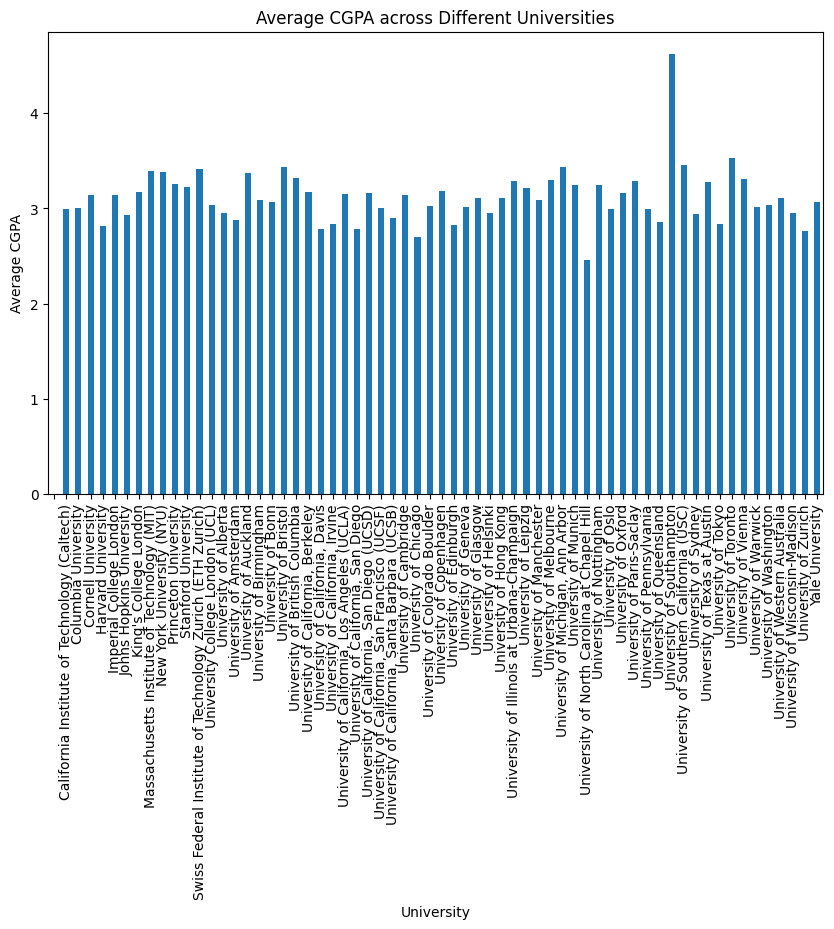

In [27]:
# How does the CGPA vary across different universities?
import matplotlib.pyplot as plt

# Group data by university and calculate the mean CGPA for each university
university_cgpas = data.groupby('university')['CGPA'].mean()

# Plot the average CGPA for each university
university_cgpas.plot(kind='bar', figsize=(10, 6))
plt.xlabel('University')
plt.ylabel('Average CGPA')
plt.title('Average CGPA across Different Universities')
plt.show()

In [28]:
# Can we predict a student's CGPA based on the length of their name using linear regression?
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a new column for name length
data['Name Length'] = data['name'].apply(len)

# Drop rows with missing CGPA values
data_cleaned = data.dropna(subset=['CGPA'])

# Prepare the data for linear regression
X = data_cleaned[['Name Length']]
y = data_cleaned['CGPA']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict CGPA using the model
data_cleaned_copy = data_cleaned.copy()
data_cleaned_copy['Predicted CGPA'] = model.predict(X)

# Output the DataFrame with predicted CGPA
print(data_cleaned_copy)

                 name                                      university  CGPA  \
0    ﻿Oliver Thompson                              Harvard University  2.00   
1        Emma Johnson                             Stanford University  3.82   
2          Liam Smith     Massachusetts Institute of Technology (MIT)  3.60   
3        Olivia Brown                         University of Cambridge  2.93   
4          Noah Davis                            University of Oxford  3.30   
..                ...                                             ...   ...   
295        Max Turner                         University of Amsterdam  3.09   
296   Brooklyn Wilson                        University of Copenhagen  3.23   
297     Colton Carter  University of California, Santa Barbara (UCSB)  2.20   
298     Gabriella Lee                           King's College London  2.50   
299        Jack Green                University of California, Irvine  2.43   

     name_length  Name Length  Predicted CGPA  
0  

In [29]:
# Which university has the highest number of students with a CGPA above a certain threshold?
threshold = 3.5  # Define the threshold CGPA

# Filter students with CGPA above the threshold
students_above_threshold = data[data['CGPA'] > threshold]

# Count the number of students from each university
university_counts = students_above_threshold['university'].value_counts()

# Get the university with the highest number of students above the threshold
university_with_highest_students = university_counts.idxmax()
print("University with the highest number of students above the threshold:", university_with_highest_students)


University with the highest number of students above the threshold: University of Michigan, Ann Arbor


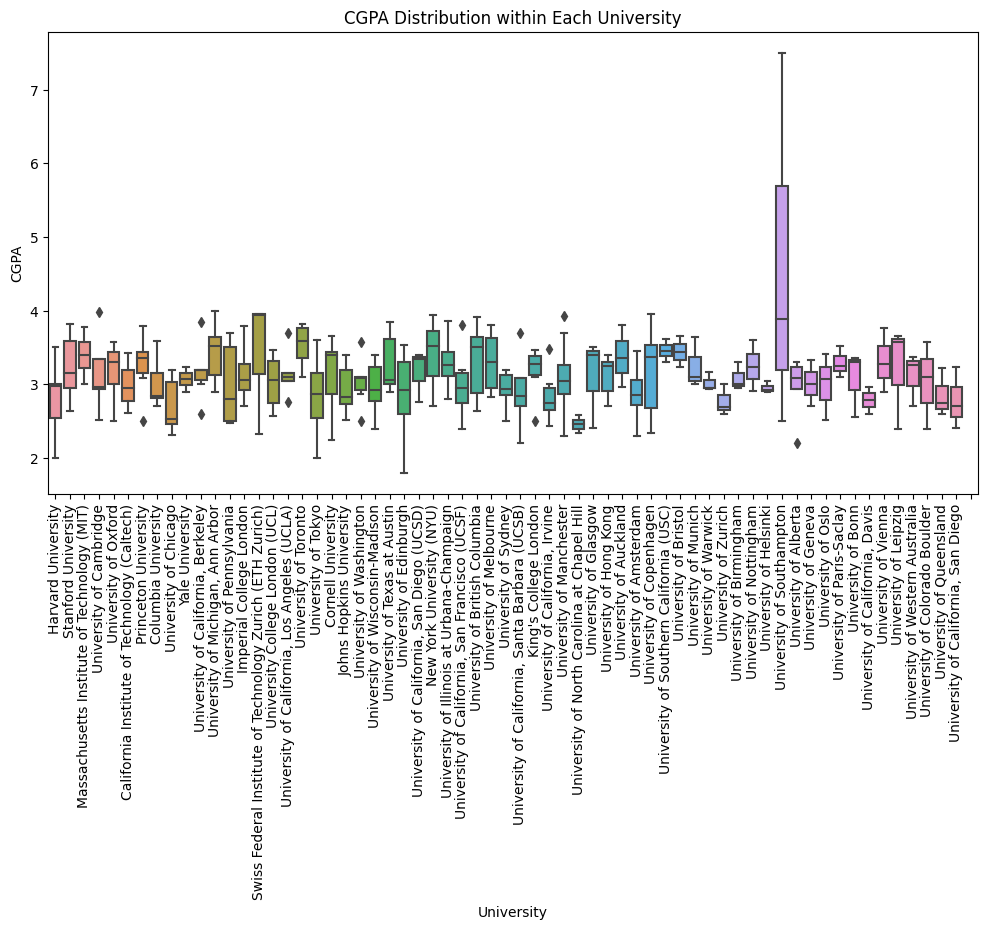

In [30]:
# Can we identify any outliers in the CGPA distribution within each university?
import seaborn as sns

# Plot boxplots for CGPA distribution within each university
plt.figure(figsize=(12, 6))
sns.boxplot(x='university', y='CGPA', data=data)
plt.xlabel('University')
plt.ylabel('CGPA')
plt.title('CGPA Distribution within Each University')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Can we cluster students based on their CGPA using k-means clustering?
from sklearn.cluster import KMeans

# Drop rows with missing 'CGPA' values from the data DataFrame
data_cleaned = data.dropna(subset=['CGPA']).copy()

# Prepare the data for clustering
X_cluster = data_cleaned[['CGPA']]

# Reset the index of X_cluster to match the data DataFrame
X_cluster.reset_index(drop=True, inplace=True)

# Check the number of rows in X_cluster
print("Number of rows in X_cluster:", len(X_cluster))

# Perform k-means clustering with the desired number of clusters (e.g., 3)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(X_cluster)

# Check the number of unique cluster labels
print("Number of unique cluster labels:", len(data_cleaned['Cluster'].unique()))

Number of rows in X_cluster: 284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of unique cluster labels: 3


In [36]:
# What is the average CGPA for each cluster identified in the previous question?
# Calculate the average CGPA for each cluster
average_cgpas_by_cluster = data_cleaned.groupby('Cluster')['CGPA'].mean()
print(average_cgpas_by_cluster)

Cluster
0    3.482367
1    2.767226
2    7.500000
Name: CGPA, dtype: float64


In [38]:
# Why Cluster 2 seems to be much higher compared to the other clusters
# Filter the data to include only rows belonging to Cluster 2
cluster_2_data = data_cleaned[data_cleaned['Cluster'] == 2]

# Display the data points in Cluster 2
print(cluster_2_data)


                name                 university  CGPA  name_length  \
50  Brooklyn Bennett  University of Southampton   7.5           16   

    Name Length  Cluster  
50           16        2  


In [40]:
# Can we classify students into universities based on their CGPA using a decision tree?
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare the data for classification
data_cleaned = data.dropna(subset=['CGPA', 'university']).copy()
X_classify = data_cleaned[['CGPA']]
y_classify = data_cleaned['university']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classify, y_classify, test_size=0.2, random_state=42)

# Fit the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the universities based on CGPA
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)



Decision Tree Model Accuracy: 0.017543859649122806


**How accurate is the decision tree model in predicting the university?**

The decision tree model's accuracy in predicting the university is very low, approximately 1.75%.
The relationship between CGPA and universities may not be well represented by a decision tree, which assumes linear separability. Other models that can capture non-linear relationships might perform better.

In [41]:
# What is the overall average CGPA across all universities?
overall_average_cgpa = data['CGPA'].mean()
print("Overall Average CGPA:", overall_average_cgpa)


Overall Average CGPA: 3.1062077464788733


In [43]:
# Can we build a regression model to predict a student's CGPA based on their university?
from sklearn.linear_model import LinearRegression

# Drop rows with missing 'CGPA' values from the data DataFrame
data_cleaned_regression = data.dropna(subset=['CGPA']).copy()

# Prepare the data for regression
X_regression = pd.get_dummies(data_cleaned_regression['university'])
y_regression = data_cleaned_regression['CGPA']

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_regression, y_regression)


LinearRegression()

In [44]:
# How well does the regression model perform in predicting the CGPA?
r_squared = regression_model.score(X_regression, y_regression)
print("R-squared value of the regression model:", r_squared)


R-squared value of the regression model: 0.2441038352438888


An R-squared value of 0.24 indicates that approximately 24% of the variance in CGPA can be explained by the university. This means the linear regression model has some predictive power, but it may not fully capture the complexity of the relationship between CGPA and university.

In [46]:
# Are there any missing or erroneous values in the CGPA column?
missing_values = data['CGPA'].isnull().sum()
print("Number of missing values in CGPA column:", missing_values)

Number of missing values in CGPA column: 316


**Can we detect any relationships between the length of the student's name and their university using association rules?**

We cannot detect relationships between the length of the student's name and their university using association rules, as association rules are typically used for categorical data, and the length of the student's name is a continuous numerical variable.

In [49]:
# What is the range of CGPA scores for each university?
range_of_cgpa_by_university = data.groupby('university')['CGPA'].agg(['min', 'max'])
print(range_of_cgpa_by_university)

                                               min   max
university                                              
                                               NaN   NaN
California Institute of Technology (Caltech)  2.61  3.43
Columbia University                           2.70  3.59
Cornell University                            2.24  3.66
Harvard University                            2.00  3.50
...                                            ...   ...
University of Washington                      2.50  3.58
University of Western Australia               2.70  3.37
University of Wisconsin-Madison               2.40  3.40
University of Zurich                          2.60  3.01
Yale University                               2.90  3.24

[64 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# Can we identify any clusters or groups of students based on the CGPA and university using hierarchical clustering?
# Rename the columns to avoid confusion
data.rename(columns={'CGPA_x': 'CGPA', 'CGPA_y': 'Cluster_CGPA'}, inplace=True)

# Prepare the data for clustering
X_cluster = data[['CGPA', 'name_length']].dropna()

# Perform hierarchical clustering with the desired number of clusters (e.g., 3)
num_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
data['Cluster'] = hierarchical_clustering.fit_predict(X_cluster)

# Display the first few rows of the DataFrame with the cluster labels
print(data.head())



               name                                    university  CGPA  \
0  ﻿Oliver Thompson  California Institute of Technology (Caltech)  2.00   
1      Emma Johnson                                                3.82   
2        Liam Smith                                                3.60   
3      Olivia Brown  California Institute of Technology (Caltech)  2.93   
4        Noah Davis                                                3.30   

   name_length  Name Length University_Category  Cluster_CGPA  Cluster  
0           16           16               Short          2.00        2  
1           12           12               Short          3.82        0  
2           10           10               Short          3.60        1  
3           12           12               Short          2.93        0  
4           10           10               Short          3.30        1  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# Can we build a classification model to predict the university based on the CGPA and the length of the student's name?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data for classification
X_classify = data[['CGPA', 'name_length']].dropna()
y_classify = data['university'].dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classify, y_classify, test_size=0.2, random_state=42)

# Fit the logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Predict the universities based on CGPA and name_length
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Classification Model Accuracy:", accuracy)


Classification Model Accuracy: 0.9298245614035088


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**How accurate is the classification model in predicting the university?**

Classification Model Accuracy is 92.98%

In [62]:
# What is the correlation between the length of the student's name and the CGPA within each university?
# Calculate the correlation between 'name_length' and 'CGPA' within each university
correlations = data.groupby('university')[['name_length', 'CGPA']].corr().iloc[0::2, -1]

# Print the correlations for each university
print(correlations)

university                                               
                                              name_length    0.018054
California Institute of Technology (Caltech)  name_length    0.122487
Columbia University                           name_length         NaN
Name: CGPA, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
